# IMPORT LYBRARIES

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time


# reading out canser dataset

In [2]:
data=pd.read_csv("canser_data.csv")

shape of data set

In [3]:
print("Cancer data set dimensions: {}".format(data.shape))

Cancer data set dimensions: (569, 33)


In [4]:
len(data.index), len(data.columns)

(569, 33)

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


2. Exploring Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

DATA PREPROCESSING

#Missing or Null Data points

In [7]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

Get object features

In [10]:
#we can see how many object(categorical) type of feature exists in dataset
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


As we can see abouve result there are 
only one single feature is categorical and it's values are B and M

To know how many unique values

In [11]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Identify dependent and independent

In [12]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [13]:
diagnosis_unique = data.diagnosis.unique()

In [14]:
diagnosis_unique

array(['M', 'B'], dtype=object)

# 3. Data Visualization.

In [17]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data = data.set_index('id')
del data['Unnamed: 32']

In [18]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


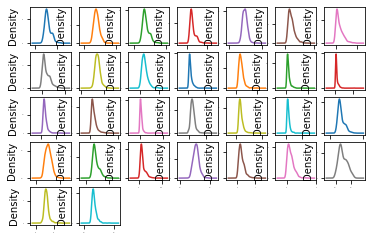

In [21]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

It is good to check the correlations between the attributes.
From the output graph below, The red around the diagonal suggests that attributes
are correlated with each other. The yellow and green patches suggest some
moderate correlation and the blue boxes show negative correlations.

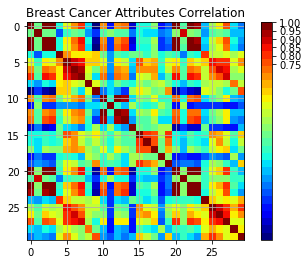

In [22]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
%matplotlib inline
sns.set_style('darkgrid')

C:\Users\Keerthy Chawla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


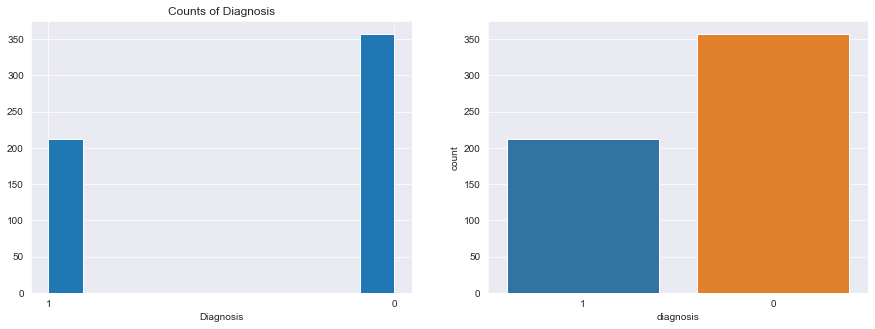

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('diagnosis', data=data); # ";" to remove output like this > <matplotlib.axes._subplots.AxesSubplot at 0x7f3a1dddba50>

# plt.show() 

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

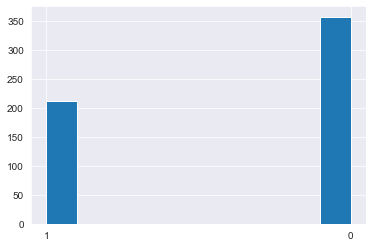

In [35]:
# plt.figure(figsize=(7,12))
plt.hist(data['diagnosis'])
# plt.show()

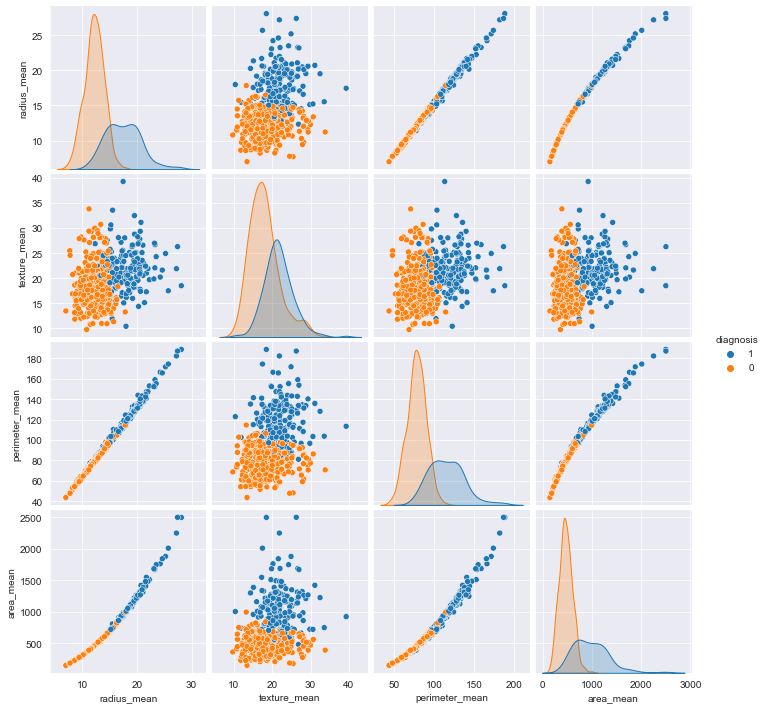

In [38]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

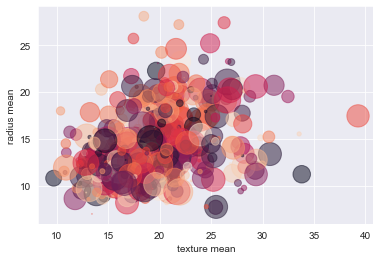

In [39]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

Data Filtering

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [42]:
#catogry to numaric
labelencoder_Y = LabelEncoder()
data.diagnosis = labelencoder_Y.fit_transform(data.diagnosis)

In [43]:
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [44]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

0    357
1    212
Name: diagnosis, dtype: int64

 569


In [45]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


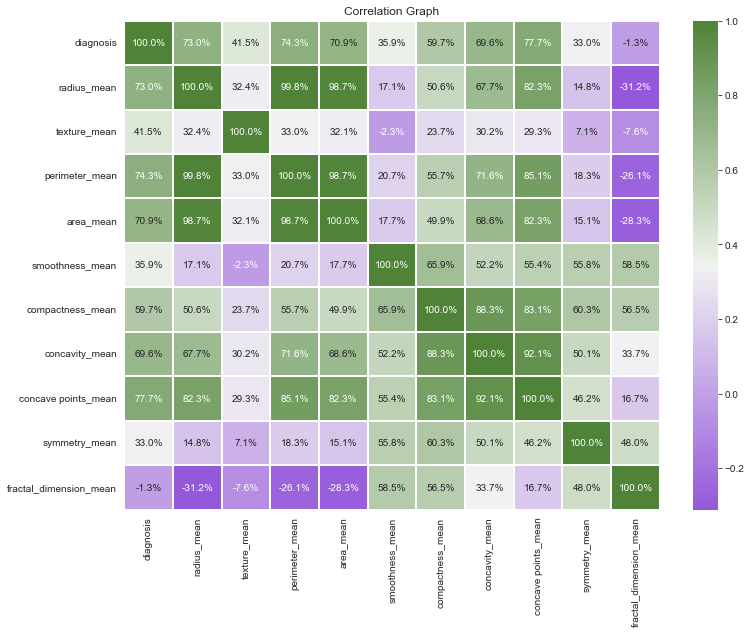

In [46]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

# Model Implementation

Train Test Splitting

In [50]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [52]:
#import Machine Learning Models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

In [53]:
#Check the Model Accuracy, Errors and it's Validations
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

In [54]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [56]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [57]:
X = data[prediction_feature]
X

# print(X.shape)
# print(X.values)

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
id,,,,,,
842302,17.99,122.80,1001.0,0.2419,0.27760,0.14710
842517,20.57,132.90,1326.0,0.1812,0.07864,0.07017
84300903,19.69,130.00,1203.0,0.2069,0.15990,0.12790
84348301,11.42,77.58,386.1,0.2597,0.28390,0.10520
84358402,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
926424,21.56,142.00,1479.0,0.1726,0.11590,0.13890
926682,20.13,131.20,1261.0,0.1752,0.10340,0.09791
926954,16.60,108.30,858.1,0.1590,0.10230,0.05302


In [58]:
y = data.diagnosis
y

# print(y.values)

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int32

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)
# print(X_test)

         radius_mean  perimeter_mean  area_mean  symmetry_mean  \
id                                                               
8911163        17.93          115.20      998.9         0.1538   
874839         12.30           78.83      463.7         0.1667   
871122         12.06           76.84      448.6         0.1590   
886776         15.32          103.20      713.3         0.2398   
913102         14.64           94.21      666.0         0.1409   
...              ...             ...        ...            ...   
8612399        18.46          121.10     1075.0         0.2132   
877500         14.45           94.49      642.7         0.1950   
8711202        17.68          117.40      963.7         0.1971   
902727         13.28           85.79      541.8         0.1617   
9112366        11.63           74.87      415.1         0.1799   

         compactness_mean  concave points_mean  
id                                              
8911163           0.07027              0.04

Perform Feature Standerd Scalling

In [60]:
# Scale the data to keep all the values in the same magnitude of 0 -1 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


ML Model Selecting and Model PredPrediction

In [61]:
def model_building(model, X_train, X_test, y_train, y_test):
    """
    
    Model Fitting, Prediction And Other stuff
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)   

In [62]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
}

# print(models_list)

In [63]:
print(list(models_list.keys()))
print(list(models_list.values()))

# print(zip(list(models_list.keys()), list(models_list.values())))

['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'SVC']
[LogisticRegression(), RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5), DecisionTreeClassifier(criterion='entropy', random_state=0), SVC()]


In [65]:
#Model Implementing

In [67]:
 #Let's Define the function for confision metric Graphs

def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
        

In [69]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy            

In [70]:
print(len(confusion_matrixs))

4


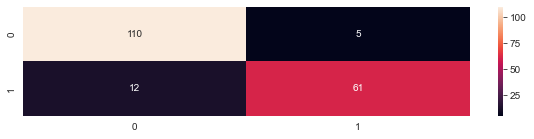

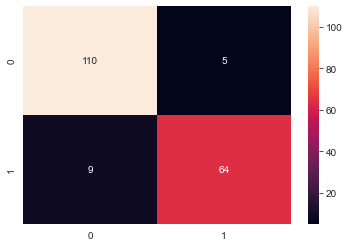

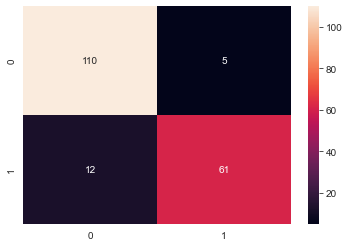

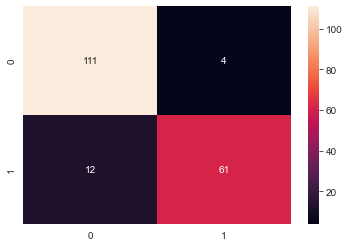

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize=(10, 2))
# plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):

    
#     plt.xlabel("Negative Positive")
#     plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
    cm_metrix_graph(cm) # Call the Confusion Metrics Graph
    plt.tight_layout(pad=True)

In [73]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%


In [74]:
df_pred.sort_values('score', ascending=False)
# df_pred.sort_values('accuracy_score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
3,SVC,0.923885,0.914894,91.49%
0,LogisticRegression,0.916010,0.909574,90.96%


In [75]:
len(data)
# print(len(X))

569

In [76]:
# Sample For testing only

cv_score = cross_validate(LogisticRegression(), X, y, cv=3,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)

pd.DataFrame(cv_score).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.015354,0.009277,0.009994,0.009998,0.010001,0.018034,0.026066
score_time,3.0,0.003334,0.005775,0.000000,0.000000,0.000000,0.005001,0.010002
test_r2,3.0,0.534312,0.186125,0.325364,0.460291,0.595218,0.638786,0.682353
train_r2,3.0,0.545196,0.051555,0.514363,0.515437,0.516511,0.560613,0.604714
test_neg_mean_squared_error,3.0,-0.108902,0.043669,-0.157895,-0.126316,-0.094737,-0.084405,-0.074074
train_neg_mean_squared_error,3.0,-0.106321,0.012102,-0.113456,-0.113307,-0.113158,-0.102753,-0.092348


In [77]:
def cross_val_scorring(model):
    
#     (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    model.fit(data[prediction_feature], data[targeted_feature])
    
    # score = model.score(X_train, y_train)    
    
    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    # Initialize K folds.
    kFold = KFold(n_splits=5) # define 5 diffrent data folds
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        # print("TRAIN:", train_index, "TEST:", test_index)

        # Data Spliting via fold indexes
        X_train = data[prediction_feature].iloc[train_index, :] # train_index = rows and all columns for Prediction_features
        y_train = data[targeted_feature].iloc[train_index] # all targeted features trains
        
        X_test = data[prediction_feature].iloc[test_index, :] # testing all rows and cols
        y_test = data[targeted_feature].iloc[test_index] # all targeted tests
        
        # Again Model Fitting
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [78]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    cross_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Using Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

In [ ]:

Y_pred = classifier.predict(X_test)